In [1]:
# Importing required libraries
from sklearn.datasets import load_wine
import pandas as pd
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from scipy import stats

In [3]:
# Load the wine dataset
wine_dataset = load_wine()

# Convert data to DataFrame and include the target
df_wine = pd.DataFrame(data=wine_dataset.data, columns=wine_dataset.feature_names)
df_wine['target'] = wine_dataset.target

# Display first few records
print(df_wine.head())

   alcohol  malic_acid   ash  alcalinity_of_ash  magnesium  total_phenols  \
0    14.23        1.71  2.43               15.6      127.0           2.80   
1    13.20        1.78  2.14               11.2      100.0           2.65   
2    13.16        2.36  2.67               18.6      101.0           2.80   
3    14.37        1.95  2.50               16.8      113.0           3.85   
4    13.24        2.59  2.87               21.0      118.0           2.80   

   flavanoids  nonflavanoid_phenols  proanthocyanins  color_intensity   hue  \
0        3.06                  0.28             2.29             5.64  1.04   
1        2.76                  0.26             1.28             4.38  1.05   
2        3.24                  0.30             2.81             5.68  1.03   
3        3.49                  0.24             2.18             7.80  0.86   
4        2.69                  0.39             1.82             4.32  1.04   

   od280/od315_of_diluted_wines  proline  target  
0          

In [5]:
# Separate features and target
X = df_wine.drop('target', axis=1)
y = df_wine['target']

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=17)

# Train Random Forest model
rf_model = RandomForestClassifier(random_state=28)
rf_model.fit(X_train, y_train)

RandomForestClassifier(random_state=28)

In [6]:
# Extract feature importances
feature_scores = rf_model.feature_importances_
feature_names = X.columns

# Create DataFrame of feature importances
df_feature_importance = pd.DataFrame({
    'Feature': feature_names,
    'Importance': feature_scores
}).sort_values(by='Importance', ascending=False)

                         Feature  Importance
12                       proline    0.172687
9                color_intensity    0.151759
6                     flavanoids    0.150643
11  od280/od315_of_diluted_wines    0.125216
0                        alcohol    0.115048
1                     malic_acid    0.063158
5                  total_phenols    0.058397
10                           hue    0.054376
3              alcalinity_of_ash    0.031411
4                      magnesium    0.028316
2                            ash    0.016921
7           nonflavanoid_phenols    0.016035
8                proanthocyanins    0.016034


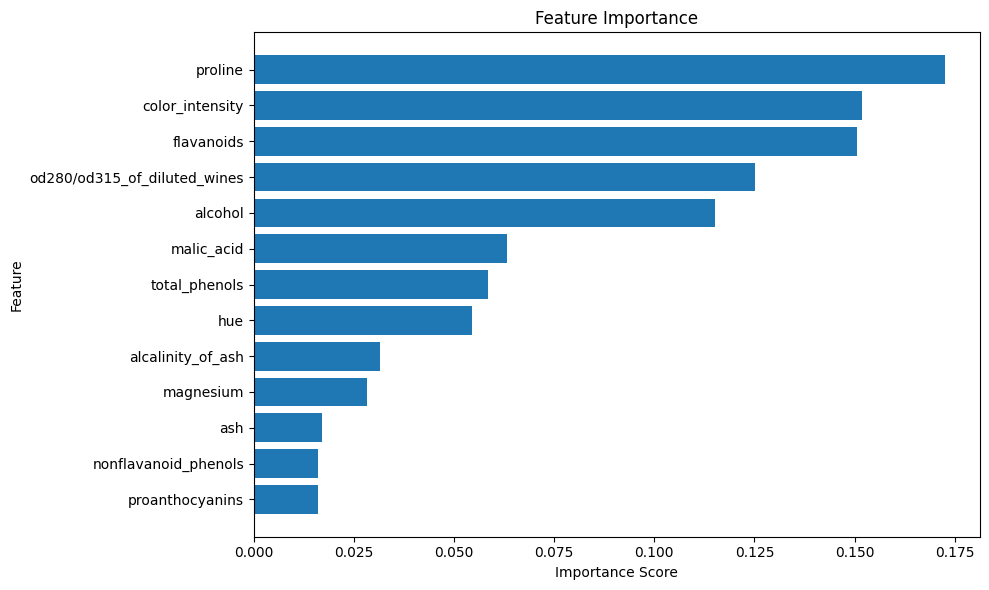

In [7]:
# Display feature importance
print(df_feature_importance)

# Plot feature importance
plt.figure(figsize=(10, 6))
plt.barh(df_feature_importance['Feature'], df_feature_importance['Importance'])
plt.gca().invert_yaxis()
plt.title('Feature Importance')
plt.xlabel('Importance Score')
plt.ylabel('Feature')
plt.tight_layout()
plt.show()

In [8]:
'''
Key Insights:
- Proline: Strong indicator; key amino acid relevant to wine classification.
- Flavanoids: Impacts taste and color; highly predictive.
- Color intensity & OD280/OD315: Relate to visual and chemical properties.
- Alcohol: Affects taste and wine classification.
'''

'\nKey Insights:\n- Proline: Strong indicator; key amino acid relevant to wine classification.\n- Flavanoids: Impacts taste and color; highly predictive.\n- Color intensity & OD280/OD315: Relate to visual and chemical properties.\n- Alcohol: Affects taste and wine classification.\n'

In [10]:
# Check for duplicates
duplicate_count = df_wine.duplicated().sum()
print(f"Number of duplicate rows: {duplicate_count}")


Number of duplicate rows: 0


In [12]:
Q1 = df_wine.quantile(0.25)
Q3 = df_wine.quantile(0.75)
IQR = Q3 - Q1
outlier_mask = (df_wine < (Q1 - 1.5 * IQR)) | (df_wine > (Q3 + 1.5 * IQR))
outlier_counts = outlier_mask.sum()
outlier_percentage = (outlier_counts / df_wine.shape[0]) * 100

outlier_summary = pd.DataFrame({
    'Outliers Count': outlier_counts,
    'Outlier %': outlier_percentage.round(2)
})

print("=== Outlier Summary (IQR Method) ===")
print(outlier_summary)

=== Outlier Summary (IQR Method) ===
                              Outliers Count  Outlier %
alcohol                                    0       0.00
malic_acid                                 3       1.69
ash                                        3       1.69
alcalinity_of_ash                          4       2.25
magnesium                                  4       2.25
total_phenols                              0       0.00
flavanoids                                 0       0.00
nonflavanoid_phenols                       0       0.00
proanthocyanins                            2       1.12
color_intensity                            4       2.25
hue                                        1       0.56
od280/od315_of_diluted_wines               0       0.00
proline                                    0       0.00
target                                     0       0.00


In [16]:
print(df_wine.isnull().sum())



alcohol                         0
malic_acid                      0
ash                             0
alcalinity_of_ash               0
magnesium                       0
total_phenols                   0
flavanoids                      0
nonflavanoid_phenols            0
proanthocyanins                 0
color_intensity                 0
hue                             0
od280/od315_of_diluted_wines    0
proline                         0
target                          0
dtype: int64


          alcohol  malic_acid         ash  alcalinity_of_ash   magnesium  \
count  178.000000  178.000000  178.000000         178.000000  178.000000   
mean    13.000618    2.336348    2.366517          19.494944   99.741573   
std      0.811827    1.117146    0.274344           3.339564   14.282484   
min     11.030000    0.740000    1.360000          10.600000   70.000000   
25%     12.362500    1.602500    2.210000          17.200000   88.000000   
50%     13.050000    1.865000    2.360000          19.500000   98.000000   
75%     13.677500    3.082500    2.557500          21.500000  107.000000   
max     14.830000    5.800000    3.230000          30.000000  162.000000   

       total_phenols  flavanoids  nonflavanoid_phenols  proanthocyanins  \
count     178.000000  178.000000            178.000000       178.000000   
mean        2.295112    2.029270              0.361854         1.590899   
std         0.625851    0.998859              0.124453         0.572359   
min         0.9

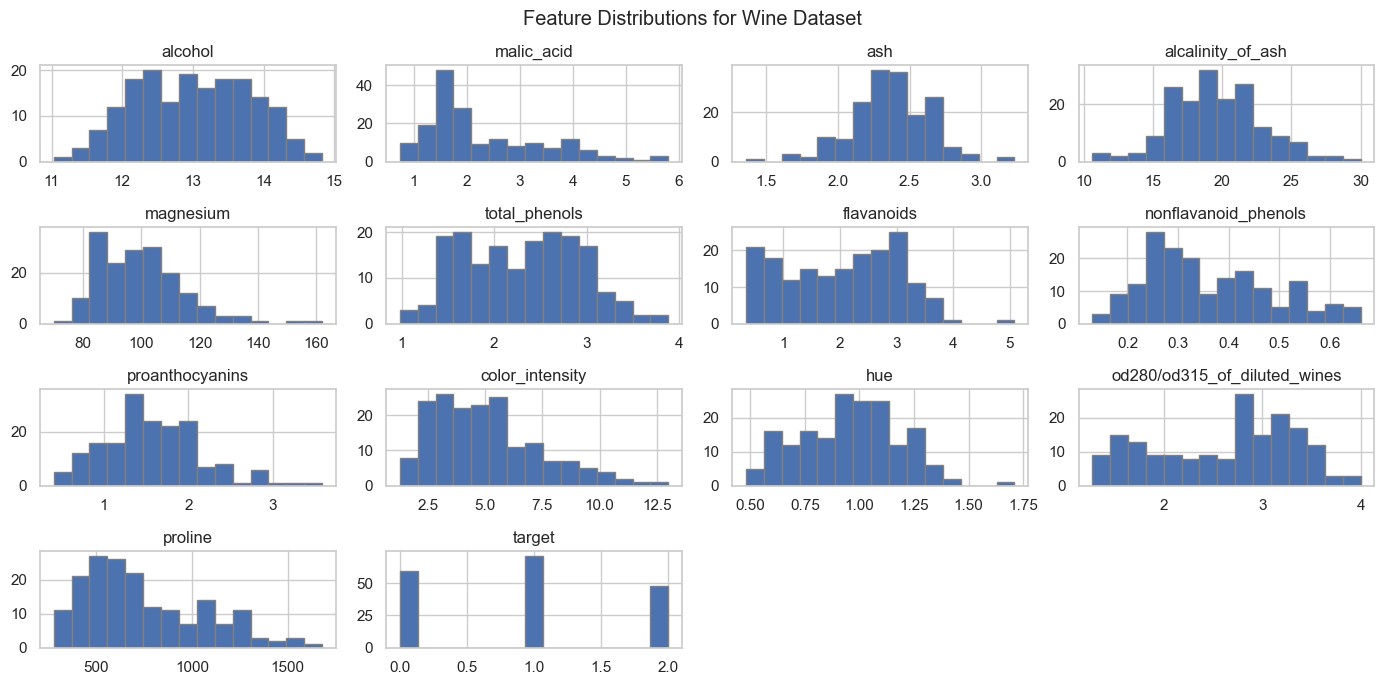

In [17]:
# Summary statistics
print(df_wine.describe())
print(df_wine.info())

# Histogram of feature distributions
sns.set(style="whitegrid")
df_wine.hist(bins=15, figsize=(14, 10), layout=(6, 4), edgecolor='grey')
plt.suptitle('Feature Distributions for Wine Dataset')
plt.tight_layout()
plt.show()

In [18]:
'''
Observations:
- Most features are normally or slightly skewed.
- Malic acid, Proline, and Magnesium are right-skewed.
- Flavanoids show left skew.
'''

'\nObservations:\n- Most features are normally or slightly skewed.\n- Malic acid, Proline, and Magnesium are right-skewed.\n- Flavanoids show left skew.\n'

In [20]:
# Skewness and Kurtosis
skew_vals = df_wine.skew()
kurt_vals = df_wine.kurt()

normality_stats = pd.DataFrame({
    'Skewness': skew_vals,
    'Kurtosis': kurt_vals
})

print(normality_stats.sort_values(by='Skewness', key=abs, ascending=False))


                              Skewness  Kurtosis
magnesium                     1.098191  2.104991
malic_acid                    1.039651  0.299207
color_intensity               0.868585  0.381522
proline                       0.767822 -0.248403
proanthocyanins               0.517137  0.554649
nonflavanoid_phenols          0.450151 -0.637191
od280/od315_of_diluted_wines -0.307285 -1.086435
alcalinity_of_ash             0.213047  0.487942
ash                          -0.176699  1.143978
target                        0.107431 -1.322787
total_phenols                 0.086639 -0.835627
alcohol                      -0.051482 -0.852500
flavanoids                    0.025344 -0.880382
hue                           0.021091 -0.344096


In [22]:
'''
Skewness Interpretation:
- > |1| : Highly skewed
- 0.5 to 1 : Moderately skewed
- < 0.5 : Approx. normal
'''

'\nSkewness Interpretation:\n- > |1| : Highly skewed\n- 0.5 to 1 : Moderately skewed\n- < 0.5 : Approx. normal\n'

In [24]:
# ------------------- Feature Transformation -------------------

# Identifying features for transformation
features_to_transform = ['proline', 'od280/od315_of_diluted_wines', 'malic_acid']
df_transformed = df_wine.copy()

# Apply log1p transformation
for col in features_to_transform:
    df_transformed[col + '_log'] = np.log1p(df_wine[col])

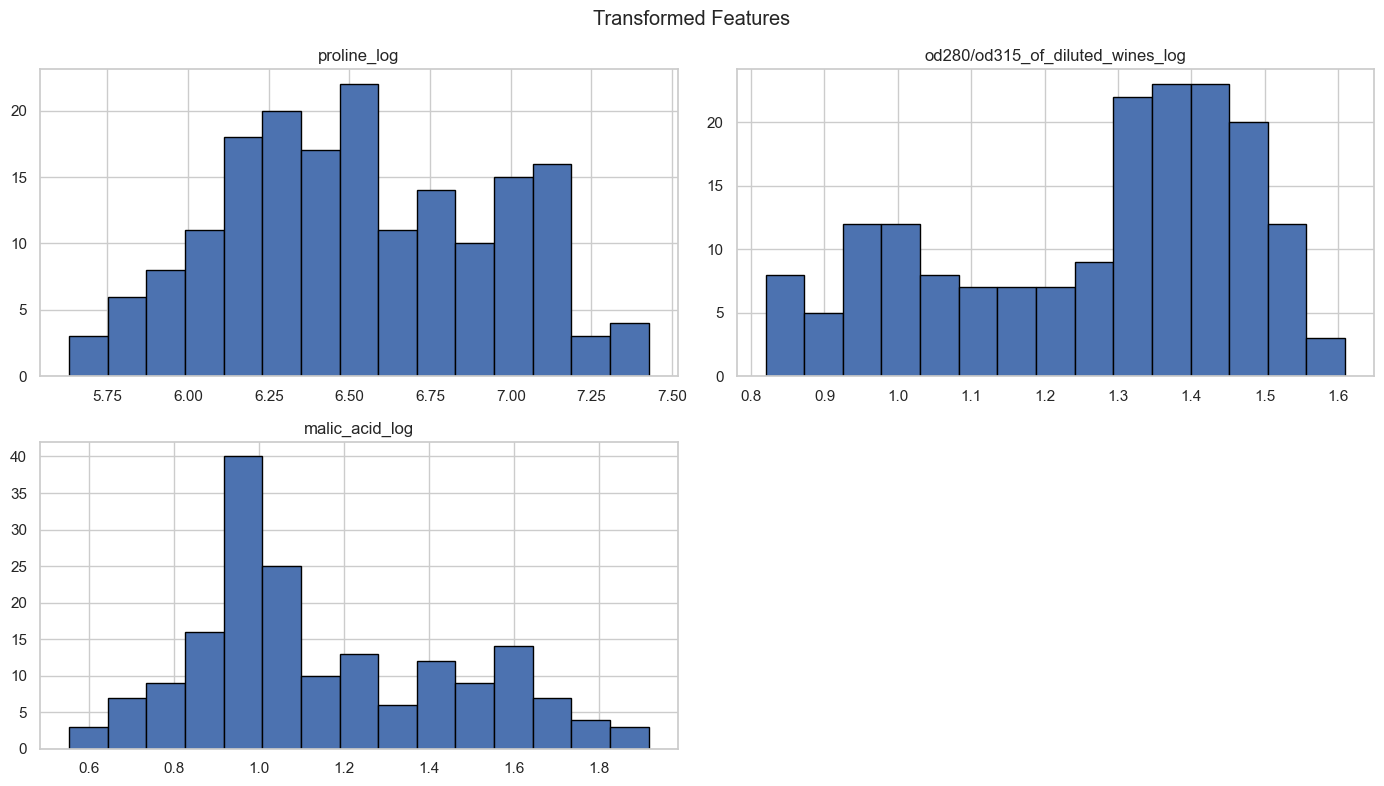

proline: Original Skew = 0.77, Log Transformed Skew = 0.09
od280/od315_of_diluted_wines: Original Skew = -0.31, Log Transformed Skew = -0.55
malic_acid: Original Skew = 1.04, Log Transformed Skew = 0.53


In [25]:
# Plot transformed features
df_transformed[[f + '_log' for f in features_to_transform]].hist(bins=15, figsize=(14, 8), edgecolor='black')
plt.suptitle('Transformed Features')
plt.tight_layout()
plt.show()

# Compare skewness before and after transformation
for col in features_to_transform:
    before = df_wine[col].skew()
    after = df_transformed[col + '_log'].skew()
    print(f"{col}: Original Skew = {before:.2f}, Log Transformed Skew = {after:.2f}")

In [26]:
'''
Conclusion:
- Log transformation helped reduce skewness.
- Transformed features are more normally distributed.
- Improved normality helps many machine learning models perform better.
'''

'\nConclusion:\n- Log transformation helped reduce skewness.\n- Transformed features are more normally distributed.\n- Improved normality helps many machine learning models perform better.\n'